In [ ]:
import pandas as pd
import numpy as np
import spacy
from IPython.display import Image


import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Setup some configuration parameters

config = {'min_text_len':40,
          'max_text_len':60,
          'max_summary_len':30,
          'latent_dim' : 300,
          'embedding_dim' : 200}

In [ ]:
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
data = data.rename(columns = {'headlines':'summary'})
data.head()

,summary,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98401 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  98401 non-null  object
 1   text     98401 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


# **Distribution of words before filtering**

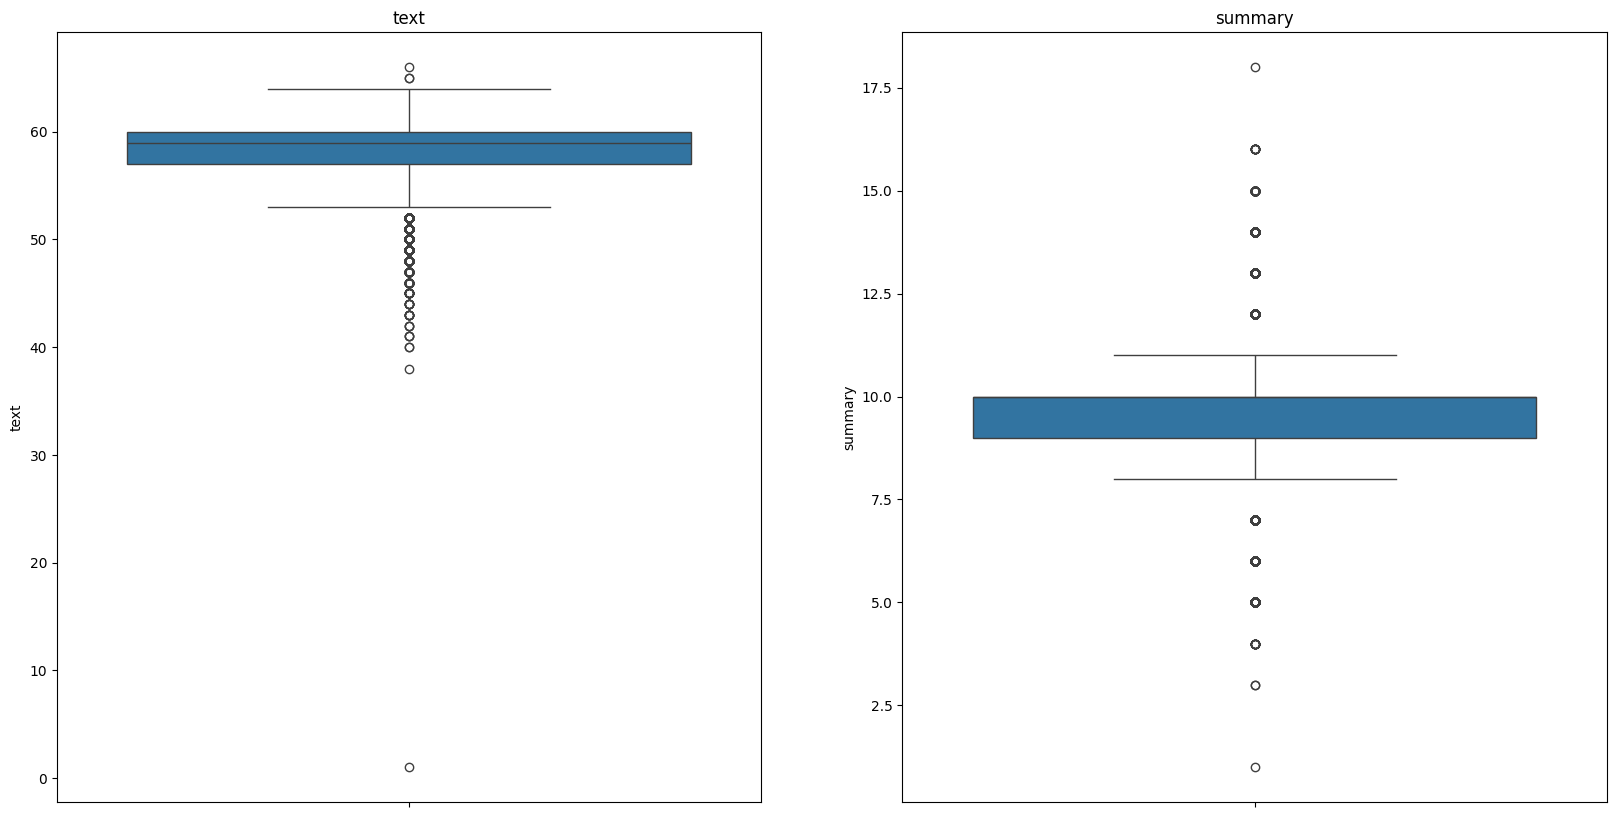

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,10))
sns.boxplot(data.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(data.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

In [ ]:
data.summary.str.split().str.len()  # [data.column_name.(str.split()).(str.len()) ]

                          # breaks down each sentances to list of words(str.split)
                          # count len of that list (str.len())

,summary
0,13
1,12
2,9
3,9
4,13
...,...
98396,9
98397,10
98398,8
98399,12


In [ ]:
data.text.str.split().str.len().describe()

,text
count,98401.000000
mean,58.237701
std,2.381343
min,1.000000
25%,57.000000
50%,59.000000
75%,60.000000
max,66.000000


In [ ]:
data.summary.str.split().str.len().describe()

,summary
count,98401.000000
mean,9.553876
std,1.457956
min,1.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,18.000000


# **Filter text in the range between 40 and 60 words**

In [ ]:
new_data = data.loc[((data['text'].str.split().str.len() > config['min_text_len'])
              & (data['text'].str.split().str.len() < config['max_text_len']))].reset_index(drop=True)

# .loc[] -> filters entire rows based on the condition
# reset index -> generate new index 0,1,2... and drop = true will drop old index

# **Distribution of words after filtering**

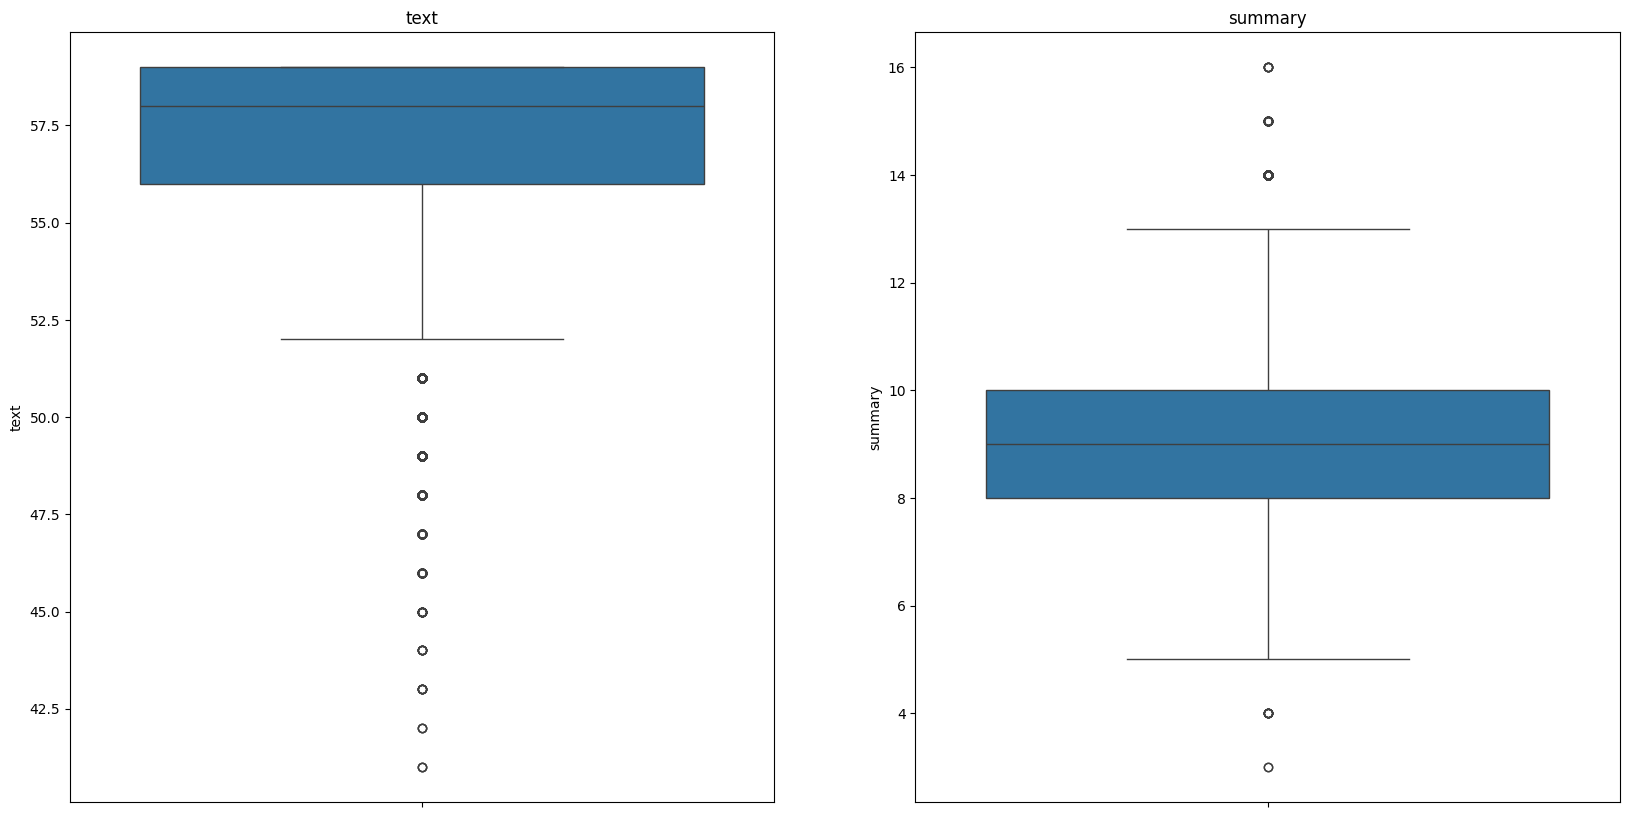

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,10))
sns.boxplot(new_data.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(new_data.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

In [ ]:
new_data.text.str.split().str.len().describe()

,text
count,55361.000000
mean,56.864056
std,2.380750
min,41.000000
25%,56.000000
50%,58.000000
75%,59.000000
max,59.000000


In [ ]:
new_data.summary.str.split().str.len().describe()

,summary
count,55361.000000
mean,9.402612
std,1.447748
min,3.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,16.000000


# **Let's look at a sample**

In [ ]:
ind = 1
print(f'Text: {new_data.text[ind]}')
print()
print(f'Summary: {new_data.summary[ind]}')
print()
print(f'Text length: {len(new_data.text[ind].split())}')
print(f'Summary length: {len(new_data.summary[ind].split())}')

Text: India recorded their lowest ODI total in New Zealand after getting all out for 92 runs in 30.5 overs in the fourth ODI at Hamilton on Thursday. Seven of India's batsmen were dismissed for single-digit scores, while their number ten batsman Yuzvendra Chahal top-scored with 18*(37). India's previous lowest ODI total in New Zealand was 108.

Summary: India get all out for 92, their lowest ODI total in New Zealand

Text length: 56
Summary length: 13


# **LSTM**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import spacy
from time import time
import numpy as np


**TEXT PREPROCESSING**

In [ ]:
import re

def clean_text(sentence):
    # Convert to string, lower case, and replace special whitespace characters with spaces
    sentence = str(sentence).lower()
    sentence = re.sub(r"[\t\r\n]", " ", sentence)

    # Replace patterns
    sentence = re.sub(r"--+|\.\.+", " ", sentence)  # Replace multiple dashes or dots
    sentence = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", sentence)  # Remove special characters
    sentence = re.sub(r"\\x9\d", " ", sentence)  # Remove \x9* patterns
    sentence = re.sub(r"[cC][mM]\d+|[cC][hH][gG]\d+", "CM_NUM", sentence)  # Replace CM# and CHG#
    sentence = re.sub(r"[.\-:]\s+", " ", sentence)  # Clean word-ending punctuations

    # Remove multiple spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()

    return sentence


# Get the cleaned text and Add start, end tokens

In [ ]:
new_data['cleaned_text'] = new_data.text.apply(clean_text)
# the .apply() method takes a function and applies it to each element in the Series.

new_data['cleaned_summary'] = new_data.summary.apply(lambda x: '_START_ '+ clean_text(x) + ' _END_')
new_data['cleaned_summary'] = new_data['cleaned_summary'].apply(lambda x: 'sostok ' + x + ' eostok')
new_data.head()

,summary,text,cleaned_text,cleaned_summary
0,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...,pakistani singer rahat fateh ali khan has deni...,sostok _START_ rahat fateh ali khan denies get...
1,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...,india recorded their lowest odi total in new z...,sostok _START_ india get all out for 92 their ...
2,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...,andhra pradesh cm n chandrababu naidu has said...,sostok _START_ called pm modi sir 10 times to ...
3,81-yr-old woman conducts physical training in ...,"Isha Ghosh, an 81-year-old member of Bharat Sc...",isha ghosh an 81-year-old member of bharat sco...,sostok _START_ 81-yr-old woman conducts physic...
4,"Karan Johar, Tabu turn showstoppers on opening...",Filmmaker Karan Johar and actress Tabu turned ...,filmmaker karan johar and actress tabu turned ...,sostok _START_ karan johar tabu turn showstopp...


In [ ]:
new_data['cleaned_summary'][0].split()

['sostok',
 '_START_',
 'rahat',
 'fateh',
 'ali',
 'khan',
 'denies',
 'getting',
 'notice',
 'for',
 'smuggling',
 'currency',
 '_END_',
 'eostok']

After cleaning , the range have changed , so again shriking the data within our configuration

In [ ]:
new_data.cleaned_text.str.split().str.len().describe()

,cleaned_text
count,55361.000000
mean,57.973592
std,2.728970
min,41.000000
25%,57.000000
50%,59.000000
75%,60.000000
max,73.000000


In [ ]:
new_data.cleaned_summary.str.split().str.len().describe()

,cleaned_summary
count,55361.000000
mean,13.676035
std,1.535365
min,7.000000
25%,13.000000
50%,14.000000
75%,15.000000
max,21.000000


In [ ]:
new_data = new_data.drop(['text', 'summary'], axis=1)
new_data = new_data.rename(columns = {'cleaned_text':'text',
                                      'cleaned_summary':'summary'})


In [ ]:
new_data.head()

,text,summary
0,pakistani singer rahat fateh ali khan has deni...,sostok _START_ rahat fateh ali khan denies get...
1,india recorded their lowest odi total in new z...,sostok _START_ india get all out for 92 their ...
2,andhra pradesh cm n chandrababu naidu has said...,sostok _START_ called pm modi sir 10 times to ...
3,isha ghosh an 81-year-old member of bharat sco...,sostok _START_ 81-yr-old woman conducts physic...
4,filmmaker karan johar and actress tabu turned ...,sostok _START_ karan johar tabu turn showstopp...


In [ ]:
data_new = new_data.loc[((new_data['text'].str.split().str.len() <= config['max_text_len'])
              & (new_data['summary'].str.split().str.len() <= config['max_summary_len']))].reset_index(drop=True)

In [ ]:
data_new.text.str.split().str.len().describe()

,text
count,47731.000000
mean,57.385431
std,2.443436
min,41.000000
25%,56.000000
50%,58.000000
75%,59.000000
max,60.000000


In [ ]:
data_new.summary.str.split().str.len().describe()

,summary
count,47731.000000
mean,13.600260
std,1.516077
min,7.000000
25%,13.000000
50%,14.000000
75%,15.000000
max,21.000000


# **Split the train and validation dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_new['text'],
                                            data_new['summary'],
                                            test_size=0.2,
                                            random_state=42,
                                            shuffle=True
                                           )

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38184,), (9547,), (38184,), (9547,))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# marking words as rare if they appear less than 5 times

def get_rare_words(text_col, thresh=5):
    # Tokenize and count word frequencies
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text_col)

    # Calculate total and rare word counts
    word_counts = tokenizer.word_counts.values()  #dict with words as key and count as values
    tot_cnt = len(word_counts)  # Total number of unique words
    cnt = sum(1 for count in word_counts if count < thresh)  # Count of rare words

    # Print and return
    print(f"% of rare words in vocabulary: {(cnt / tot_cnt) * 100:.2f}%")
    return cnt, tot_cnt


**TOKENIZE THE TRAIN DATASET**

In [ ]:
x_train_cnt, x_train_tot_cnt = get_rare_words(x_train)
x_train_cnt , x_train_tot_cnt

% of rare words in vocabulary: 64.75%


(36550, 56450)

In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words=x_train_tot_cnt - x_train_cnt)
# x_tokenizer = Tokenizer(num_words = x_train_tot_cnt)
x_tokenizer.fit_on_texts(x_train)

# Convert text sequences to integer sequences
x_train_seq = x_tokenizer.texts_to_sequences(x_train)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

# Pad zero upto maximum length
x_train_padded = pad_sequences(x_train_seq,  maxlen=config['max_text_len'], padding='post')
x_test_padded = pad_sequences(x_test_seq, maxlen=config['max_text_len'], padding='post')

In [ ]:
x_tokenizer.num_words

19900

In [ ]:
x_train_tot_cnt - x_train_cnt

19900

In [ ]:
# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print(f"Size of vocabulary in X = {x_voc}")

Size of vocabulary in X = 19901


**TOKENIZE THE TEST DATASET**

In [ ]:
y_train_cnt, y_train_tot_cnt = get_rare_words(y_train)
y_train_cnt, y_train_tot_cnt

% of rare words in vocabulary: 67.48%


(16922, 25078)

In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=y_train_tot_cnt - y_train_cnt)
# y_tokenizer = Tokenizer(num_words=y_train_tot_cnt)
y_tokenizer.fit_on_texts(y_train)

# Convert text sequences to integer sequences
y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Pad zero upto maximum length
y_train_padded = pad_sequences(y_train_seq, maxlen=config['max_summary_len'], padding='post')
y_test_padded = pad_sequences(y_test_seq, maxlen=config['max_summary_len'], padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print(f"Size of vocabulary in Y = {y_voc}")

Size of vocabulary in Y = 8157


# **Initialize the Encoder and Decoder architecture**

In [ ]:
latent_dim = config['latent_dim']  # no of units in lstm (stacks in lstm)
embedding_dim = config['embedding_dim']
max_text_len = config['max_text_len']
max_summary_len = config['max_summary_len']

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)
                                      # true->embedding layer's weights are updated during training through backpropagation.
# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)


# encoders are stacked one over the other (order 1,2,3)


In [ ]:
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)



In [ ]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 60)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 60, 200)        │      3,980,200 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 60, 300),      │        601,200 │ embedding[0][0]        │
│                           │ (None, 300), (None,    │                │                        │
│                           │ 300)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 60, 300),      │        721,200 │ lstm[0][0]             │
│                           │ (None, 300), (None,    │                │                        │
│                           │ 300)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 200)      │      1,631,400 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 60, 300),      │        721,200 │ lstm_1[0][0]           │
│                           │ (None, 300), (None,    │                │                        │
│                           │ 300)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, None, 300),    │        601,200 │ embedding_1[0][0],     │
│                           │ (None, 300), (None,    │                │ lstm_2[0][1],          │
│                           │ 300)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, None, 8157)     │      2,455,257 │ lstm_3[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,711,657 (40.86 MB)

 Trainable params: 10,711,657 (40.86 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and train the model

In [ ]:
y_train_padded

array([[   3,    2, 3911, ...,    0,    0,    0],
       [   3,    2,   44, ...,    0,    0,    0],
       [   3,    2, 4156, ...,    0,    0,    0],
       ...,
       [   3,    2,  386, ...,    0,    0,    0],
       [   3,    2,   56, ...,    0,    0,    0],
       [   3,    2, 2787, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train_padded.shape

(38184, 30)

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Save the model weights with correct filename extension(.weights.h5)
model_name = "model.weights.h5"

save_model = tf.keras.callbacks.ModelCheckpoint(filepath=model_name,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                       mode='min',
                                       verbose=1,
                                       patience=10)


In [ ]:
# slicing syntax -> [row_start:row_end, column_start:column_end]
# start is inclusive
# end is exclusive


history = model.fit(
    [x_train_padded, y_train_padded[:, :-1]],  # last token is removed and sent
    y_train_padded.reshape(y_train_padded.shape[0], y_train_padded.shape[1], 1)[:, 1:],   # just made as 3d
    epochs=500,                                                                             # first token is removed
    callbacks=[es, save_model],
    batch_size=1024,
    validation_data=([x_test_padded, y_test_padded[:, :-1]],
                     y_test_padded.reshape(y_test_padded.shape[0], y_test_padded.shape[1], 1)[:, 1:]),
    )

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 44s/step - accuracy: 0.5366 - loss: 6.1489 
Epoch 1: val_loss improved from inf to 2.68334, saving model to model.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1841s 48s/step - accuracy: 0.5380 - loss: 6.1017 - val_accuracy: 0.6223 - val_loss: 2.6833
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - accuracy: 0.6333 - loss: 2.6581 
Epoch 2: val_loss improved from 2.68334 to 2.45150, saving model to model.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1889s 48s/step - accuracy: 0.6337 - loss: 2.6566 - val_accuracy: 0.6945 - val_loss: 2.4515
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - accuracy: 0.6907 - loss: 2.4776 
Epoch 3: val_loss improved from 2.45150 to 2.38000, saving model to model.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1864s 48s/step - accuracy: 0.6907 - loss: 2.4772 - val_accuracy: 0.6985 - val_loss: 2.3800
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - accuracy: 0.6939 - loss: 2.4149 
Epoch 4: val_loss improved from 2.38000 to 2.34929,

LOAD THE MODEL

In [ ]:
model.load_weights('model.weights.h5')

# dont worry about warning , just compile again

In [ ]:
# re run if you want to continue from where you left

history = model.fit(
    [x_train_padded, y_train_padded[:, :-1]],  # last token is removed and sent
    y_train_padded.reshape(y_train_padded.shape[0], y_train_padded.shape[1], 1)[:, 1:],   # just made as 3d
    epochs=500,                                                                             # first token is removed
    callbacks=[es, save_model],
    batch_size=1024,
    validation_data=([x_test_padded, y_test_padded[:, :-1]],
                     y_test_padded.reshape(y_test_padded.shape[0], y_test_padded.shape[1], 1)[:, 1:]),
    )

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - accuracy: 0.6967 - loss: 2.2925 
Epoch 1: val_loss improved from inf to 2.25495, saving model to model.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1852s 48s/step - accuracy: 0.6967 - loss: 2.2925 - val_accuracy: 0.7007 - val_loss: 2.2549
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 41s/step - accuracy: 0.6975 - loss: 2.2697 
Epoch 2: val_loss improved from 2.25495 to 2.23930, saving model to model.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1797s 46s/step - accuracy: 0.6975 - loss: 2.2697 - val_accuracy: 0.7014 - val_loss: 2.2393
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 40s/step - accuracy: 0.6984 - loss: 2.2465 
Epoch 3: val_loss improved from 2.23930 to 2.22087, saving model to model.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1746s 46s/step - accuracy: 0.6984 - loss: 2.2465 - val_accuracy: 0.7029 - val_loss: 2.2209
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 40s/step - accuracy: 0.6999 - loss: 2.2266 
Epoch 4: val_loss improved from 2.22087 to 2.19845,

KeyboardInterrupt: 

In [ ]:
model.load_weights('model.weights.h5')

# dont worry about warning , just compile again

# Reverse encode the index to their tokens

In [ ]:
reverse_source_word_index = x_tokenizer.index_word
reverse_target_word_index = y_tokenizer.index_word
target_word_index = y_tokenizer.word_index

# Create the Decoder inference architecture

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if (i != 0) and (i != target_word_index['sostok']) and (i != target_word_index['eostok']):
            newString = newString + reverse_target_word_index[i] + ' '

    return newString

In [ ]:
actual = []
predicted = []
for i in range(0, 50):
    print ('Review:', seq2text(x_train_padded[i]))

    actual.append(seq2summary(y_train_padded[i]))
    print ('Original summary:', actual[-1])

    predicted.append(decode_sequence(x_train_padded[i].reshape(1, config['max_text_len'])))
    print ('Predicted summary:', predicted[-1])
    print()



Review: a vietnamese court has sentenced an activist to 14 years in jail for live streaming a protest against a steel plant had live streamed fishermen marching to file a lawsuit against the steel plant s discharge of such as cyanide and in the ocean he was convicted of abusing his democratic freedom his lawyer said 
Original summary: start vietnam activist jailed for for live streaming protest end 
Predicted summary:  start india s first a ever to be in india end

Review: one student died and about 100 fell sick after consuming a mid day meal at a school in district of jharkhand police said the students had vomited and complained of stomach ache after which they were taken to a local hospital the police said they have ordered an inquiry into the incident 
Original summary: start 1 child dies 100 fall sick after mid day meal in jharkhand end 
Predicted summary:  start india s first a ever to be in india end

Review: mobile phones and tvs will become expensive in the 2018 19 as the cust

In [ ]:
prediction_df = pd.DataFrame({'Actual':actual, 'Predicted':predicted})
prediction_df.head(10)